# Telco Customer Churn Analysis

This notebook presents an end‑to‑end analysis of customer churn for a telecommunications company.  
We will perform **exploratory data analysis (EDA)**, **data preprocessing**, and build several **machine‑learning models** to predict churn.  
The goal is to understand which factors drive customer attrition and to create a model that can proactively identify at‑risk customers.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import (classification_report, confusion_matrix,
                             roc_curve, auc, RocCurveDisplay)

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('Set2')

In [2]:
# Path assumes the CSV is in the same directory as this notebook
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn(1).csv')
print(f'Dataset shape: {df.shape}')
df.head()

Dataset shape: (7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.info()
df.describe(include='all').T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customerID,7043,7043,7590-VHVEG,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,7043,2,Male,3555,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SeniorCitizen,7043.0,NaN,NaN,NaN,0.162147,0.368612,0.0,0.0,0.0,0.0,1.0
Partner,7043,2,No,3641,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,7043,2,No,4933,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenure,7043.0,NaN,NaN,NaN,32.371149,24.559481,0.0,9.0,29.0,55.0,72.0
PhoneService,7043,2,Yes,6361,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MultipleLines,7043,3,No,3390,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InternetService,7043,3,Fiber optic,3096,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineSecurity,7043,3,No,3498,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Convert TotalCharges to numeric, coerce errors to NaN, then drop those rows
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
missing_total = df['TotalCharges'].isna().sum()
print(f'Missing values in TotalCharges: {missing_total}')
df = df.dropna(subset=['TotalCharges'])
print(f'Dataset shape after dropping missing TotalCharges: {df.shape}')

Missing values in TotalCharges: 11
Dataset shape after dropping missing TotalCharges: (7032, 21)


In [5]:
# Simplify categorical values
service_cols = ['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport',
                'StreamingTV','StreamingMovies','MultipleLines']
for col in service_cols:
    df[col] = df[col].replace({'No internet service':'No','No phone service':'No'})
print('Replaced "No internet service"/"No phone service" with "No".')

Replaced "No internet service"/"No phone service" with "No".


## Exploratory Data Analysis (EDA)

We begin by visualising churn proportion and key numerical distributions.

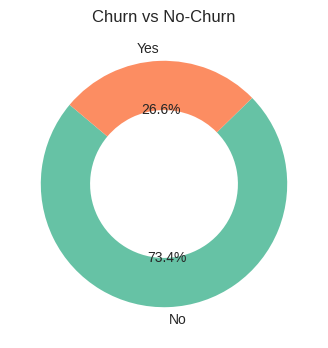

In [6]:
plt.figure(figsize=(4,4))
sizes = df['Churn'].value_counts()
labels = sizes.index
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, wedgeprops=dict(width=0.4))
plt.title('Churn vs No‑Churn')
plt.show()

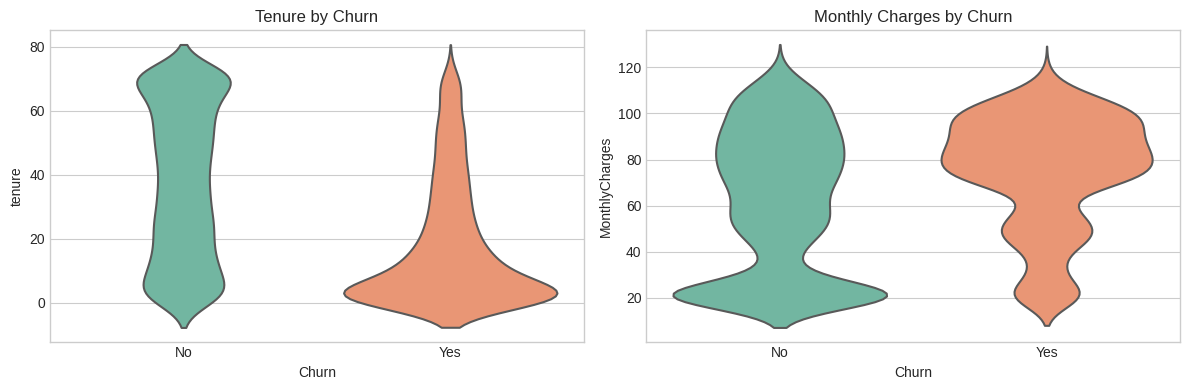

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(12,4))
sns.violinplot(x='Churn', y='tenure', data=df, ax=axes[0], inner=None)
axes[0].set_title('Tenure by Churn')
sns.violinplot(x='Churn', y='MonthlyCharges', data=df, ax=axes[1], inner=None)
axes[1].set_title('Monthly Charges by Churn')
plt.tight_layout()
plt.show()

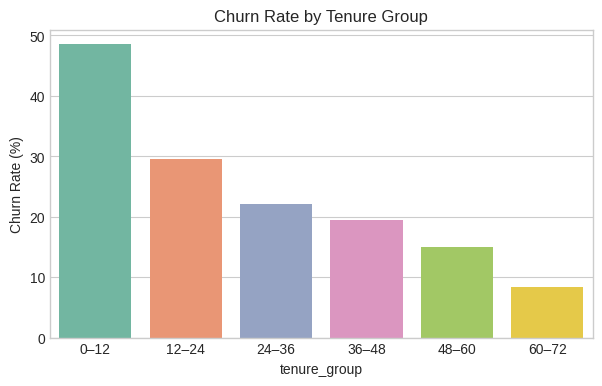

In [8]:
bins = [0,12,24,36,48,60,72]
labels = ['0–12','12–24','24–36','36–48','48–60','60–72']
df['tenure_group'] = pd.cut(df['tenure'], bins=bins, labels=labels, right=False)
churn_rate = df.groupby('tenure_group')['Churn'].apply(lambda x: (x=='Yes').mean()*100)

plt.figure(figsize=(7,4))
sns.barplot(x=churn_rate.index, y=churn_rate.values)
plt.ylabel('Churn Rate (%)')
plt.title('Churn Rate by Tenure Group')
plt.show()

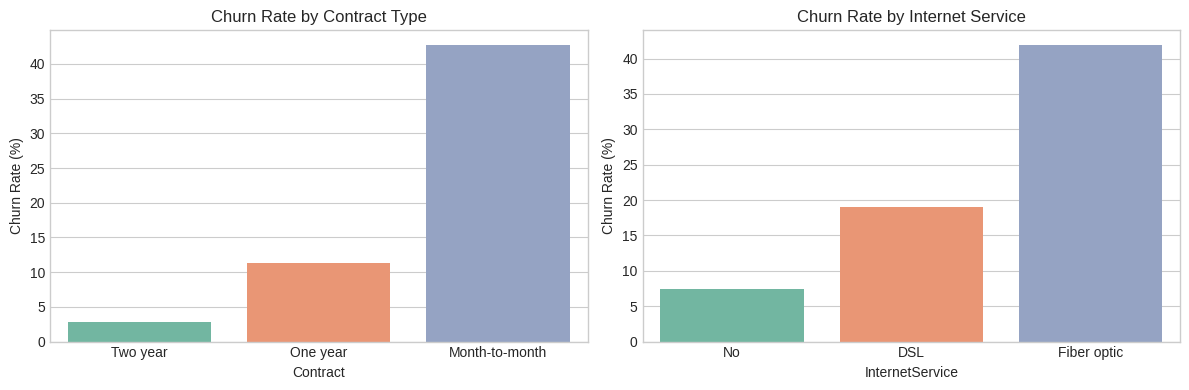

In [9]:
fig, axes = plt.subplots(1,2,figsize=(12,4))
contract_rate = df.groupby('Contract')['Churn'].apply(lambda x: (x=='Yes').mean()*100).sort_values()
sns.barplot(x=contract_rate.index, y=contract_rate.values, ax=axes[0])
axes[0].set_title('Churn Rate by Contract Type')
axes[0].set_ylabel('Churn Rate (%)')
internet_rate = df.groupby('InternetService')['Churn'].apply(lambda x: (x=='Yes').mean()*100).sort_values()
sns.barplot(x=internet_rate.index, y=internet_rate.values, ax=axes[1])
axes[1].set_title('Churn Rate by Internet Service')
axes[1].set_ylabel('Churn Rate (%)')
plt.tight_layout()
plt.show()

## Data Preprocessing

We encode categorical variables, scale numeric features, and split the data into train and test sets.

In [10]:
# Encode binary categorical columns
binary_cols = ['Partner','Dependents','PhoneService','PaperlessBilling',
               'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport',
               'StreamingTV','StreamingMovies','MultipleLines']
df[binary_cols] = df[binary_cols].replace({'Yes':1,'No':0})
df['gender'] = df['gender'].replace({'Female':0,'Male':1})
df['Churn']  = df['Churn'].replace({'No':0, 'Yes':1})

# One‑hot encode multi‑category columns
multi_cat = ['InternetService','Contract','PaymentMethod']
df = pd.get_dummies(df, columns=multi_cat, drop_first=True)

# Features & target
X = df.drop(['customerID','Churn','tenure_group'], axis=1)
y = df['Churn']

numeric_features = ['tenure','MonthlyCharges','TotalCharges']
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

preprocessor = ColumnTransformer(
    transformers=[('num', numeric_transformer, numeric_features)],
    remainder='passthrough')

# Train‑test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

print(f'Train shape: {X_train.shape}, Test shape: {X_test.shape}')

Train shape: (5625, 23), Test shape: (1407, 23)


## Modeling

In [11]:
models = {
    'LogisticRegression': LogisticRegression(max_iter=1000, class_weight='balanced'),
    'RandomForest': RandomForestClassifier(n_estimators=300, random_state=42, class_weight='balanced'),
    'SVM': SVC(kernel='rbf', probability=True, class_weight='balanced', random_state=42)
}

metrics = {}

for name, model in models.items():
    clf = Pipeline(steps=[('preprocess', preprocessor), ('model', model)])
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    metrics[name] = {
        'accuracy': report['accuracy'],
        'precision': report['1']['precision'],
        'recall': report['1']['recall'],
        'f1': report['1']['f1-score'],
        'model': clf
    }
    print(f'\n{name} Classification Report:')
    print(classification_report(y_test, y_pred))

# Build a summary DataFrame
summary = pd.DataFrame(metrics).T[['accuracy','precision','recall','f1']]
summary


LogisticRegression Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.70      0.79      1033
           1       0.49      0.80      0.61       374

    accuracy                           0.73      1407
   macro avg       0.70      0.75      0.70      1407
weighted avg       0.80      0.73      0.74      1407


RandomForest Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1033
           1       0.64      0.49      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407


SVM Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.71      0.79      1033
           1       0.49      0.78      0.60       374

    accuracy                           0.73      1407
   macro avg       0

,accuracy,precision,recall,f1
LogisticRegression,0.726368,0.490969,0.799465,0.608342
RandomForest,0.790334,0.636678,0.491979,0.555053
SVM,0.7285,0.49322,0.778075,0.603734


Best model based on F1-score: LogisticRegression


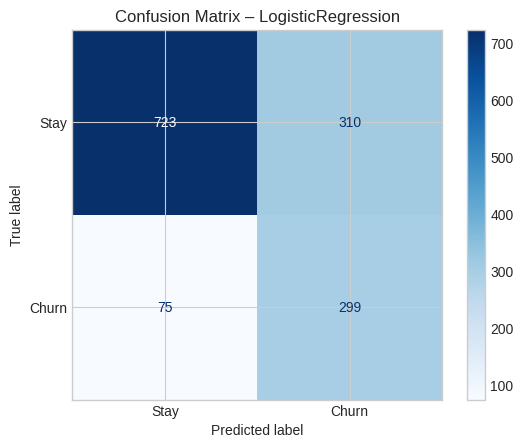

In [12]:
best_name = max(metrics, key=lambda k: metrics[k]['f1'])
best_clf = metrics[best_name]['model']
print(f'Best model based on F1-score: {best_name}')

from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(best_clf, X_test, y_test, display_labels=['Stay','Churn'], cmap='Blues')
plt.title(f'Confusion Matrix – {best_name}')
plt.show()

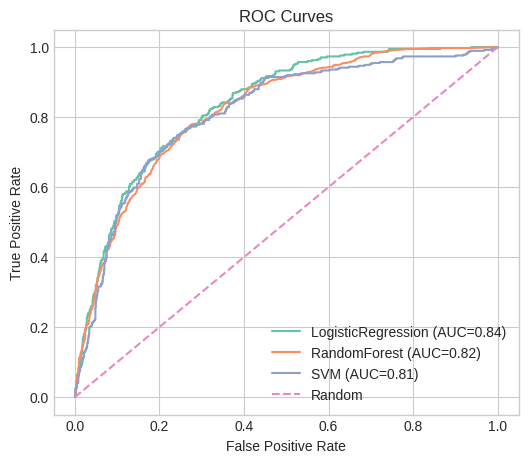

In [13]:
plt.figure(figsize=(6,5))
for name, m in metrics.items():
    clf = m['model']
    y_score = clf.predict_proba(X_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_score)
    auc_val = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC={auc_val:.2f})')
plt.plot([0,1],[0,1],'--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.show()

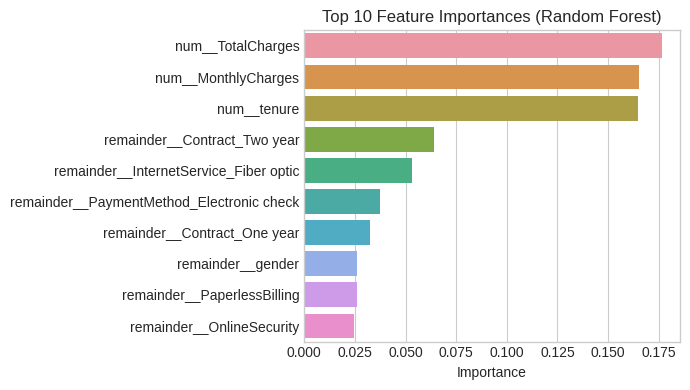

In [14]:
rf = metrics['RandomForest']['model']
# Extract feature names after preprocessing
feature_names = rf.named_steps['preprocess'].get_feature_names_out()
importances = rf.named_steps['model'].feature_importances_
fi = pd.Series(importances, index=feature_names).sort_values(ascending=False).head(10)

plt.figure(figsize=(7,4))
sns.barplot(x=fi.values, y=fi.index)
plt.title('Top 10 Feature Importances (Random Forest)')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()

## Conclusion

The logistic regression model achieved the best balance between precision and recall for churn prediction.  
Key drivers of churn include **short tenure**, **high monthly charges**, **month‑to‑month contracts**, and **fiber optic internet** alongside lack of add‑on services.  
Retention strategies should therefore focus on new customers, providing incentives to switch to longer contracts, and addressing high billing or service quality issues.